Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Bilježnica 5: Regresija

(c) 2015 Jan Šnajder

<i>Verzija: 0.1 (2015-11-04)</i>

In [1]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Sadržaj:

* Uvod

* Postupak najmanjih kvadrata

* Poopćeni linearan model regresije

* Odabir modela

* Regularizirana regresija

* Sažetak

# Osnovni pojmovi

* Označen skup podataka: $\mathcal{D}=\{(\mathbf{x}^{(i)},y^{(i)})\},\quad \mathbf{x}\in\mathbb{R}^n,\quad y\in\mathbb{R}$


* Hipoteza $h$ aproksimira nepoznatu  funkciju $f:\mathbb{R}^n\to\mathbb{R}$


* Idealno, $y^{(i)}=f(\mathbf{x}^{(i)})$, ali zbog šuma: $$y^{(i)}=f(\mathbf{x}^{(i)})+\varepsilon$$


* $\mathbf{x}$ - **ulazna varijabla** (nezavisna, prediktorska)


* $y$ - **izlazna varijabla** (zavisna, kriterijska)


### Vrste regresije

* Broj ulaznih (nezavisnih) varijabli:
  * Univarijatna (jednostavna, jednostruka) regresija: $n=1$
  * Multivarijatna (višestruka, multipla) regresija: $n>1$


* Broj izlaznih (zavisnih) varijabli:
  * Jednoizlazna regresija: $f(\mathbf{x}) = y$
  * Višeizlazna regresija: $f(\mathbf{x})=\mathbf{y}$
  
---

* Trebamo definirati: 
  * (1) model
  * (2) funkciju gubitka (funkciju pogreške)
  * (3) optimizacijski postupak

### (1) Model

* **Linearan model regresije**: $h$ je linearna funkcija <u>parametara</u>
$\mathbf{w} = (w_0,\dots,w_n)$


* Linearna regresija:
    $$h(\mathbf{x}|\mathbf{w}) = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$


* Polinomijalna regresija:
    * Univarijatna: $$h(\mathbf{x}|\mathbf{w}) = w_0 + w_1 x + w_2 x^2 + \dots + w_d x^d\quad (n=1)$$
    * Multivarijatna: $$h(\mathbf{x}|\mathbf{w}) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2\quad (n=2, d=2)$$
      * Modelira međuovisnost značajki (*cross-terms* $x_1 x_2, \dots$) 


* Općenite **bazne funkcije**:
    $$h(\mathbf{x}|\mathbf{w}) = w_0 + w_1\phi_1(\mathbf{x}) + \dots + w_m\phi_m(\mathbf{x})$$

### (2) Funkcija gubitka (funkcija pogreške)

* Kvadratni gubitak (engl. *quadratic loss*)

$$
L(y^{(i)},h(\mathbf{x}^{(i)})) = \big(y^{(i)}-h(\mathbf{x}^{(i)})\big)^2
$$

* Funkcija pogreške (proporcionalna s empirijskim očekivanjem gubitka):
$$
E(h|\mathcal{D})=\frac{1}{2}
\sum_{i=1}^N\big(y^{(i)}-h(\mathbf{x}^{(i)})\big)^2
$$

### (3) Optimizacijski postupak

* Postupak **najmanjih kvadrata** (engl. *least squares*)

### Klasifikacijska odluka

* MAP-hipoteza:
\begin{align*}
h : \mathcal{X} &\to \{\mathcal{C}_1, \mathcal{C}_2,\dots, \mathcal{C}_K\}\\
h(\mathbf{x})&=\displaystyle\mathrm{argmax}_{\mathcal{C}_k}\ p(\mathbf{x}|\mathcal{C}_k) P(\mathcal{C}_k)
\end{align*}

* Pouzdanost klasifikacije u $\mathcal{C}_j$:
\begin{align*}
h_j : \mathcal{X} &\to [0,\infty)\\
h_j(\mathbf{x})&=p(\mathbf{x}|\mathcal{C}_k) P(\mathcal{C}_k)
\end{align*}

* Vjerojatnost klasifikacije u $\mathcal{C}_j$:
\begin{align*}
h_j : \mathcal{X} &\to [0,1]\\
h_j(\mathbf{x})&=P(\mathcal{C}_k|\mathbf{x})
\end{align*}

### Primjer

* $P(\mathcal{C}_1) = P(\mathcal{C}_2)=0.3$, $P(\mathcal{C}_3)=0.4$
* Za neki primjer $\mathbf{x}$ imamo:  $p(\mathbf{x}|\mathcal{C}_1)=0.9$, $p(\mathbf{x}|\mathcal{C}_2)=p(\mathbf{x}|\mathcal{C}_3)=0.4$
* U koju klasu klasificiramo $\mathbf{x}$?



### Minimizacija pogreške klasifikacije*

* Pretpostavimo da primjeri u stvarnosti dolaze iz dva područja: 
    * $\mathcal{R}_1=\{\mathbf{x}\in\mathcal{X}\mid h_1(\mathbf{x})=1\}$
    * $\mathcal{R}_2=\mathcal{X}\setminus\mathcal{R}_1$

* Vjerojatnost pogrešne klasifikacije:

\begin{align*}
P(\mathbf{x}\in\mathcal{R}_1,\mathcal{C}_2) &+ P(\mathcal{x}\in\mathcal{R}_2,\mathcal{C}_1)\\ 
\int_{\mathbf{x}\in\mathcal{R}_1} p(\mathbf{x},\mathcal{C}_2)\,\mathrm{d}\mathbf{x} &+ 
\int_{\mathbf{x}\in\mathcal{R}_2} p(\mathbf{x},\mathcal{C}_1)\,\mathrm{d}\mathbf{x}
\end{align*}


* [Skica]


* Pogreška je minimizirana kada $\mathcal{C}_j = \mathrm{argmax}_{\mathcal{C}\in\{\mathcal{C_1},\mathcal{C_2}\}} P(\mathbf{x},\mathcal{C}_j) $


### Alternativa: Minimizacija rizika*

* $L_{kj}$ - gubitak uslijed pogrešne klasifikacije primjera iz klase $\mathcal{C}_k$ u klasu $\mathcal{C}_j$


* Očekivani gubitak (funkcija rizika):
  
$$
\mathbb{E}[L] = \sum_{k=1}^K\sum_{j=1}^K \int_{\mathbf{x}\in\mathcal{R}_j}
L_{kj}\,p(\mathbf{x},\mathcal{C}_k)\,\mathrm{d}\mathbf{x}
$$


* Očekivani rizik pri klasifikaciji $\mathbf{x}$ u $\mathcal{C}_j$:

$$
R(\mathcal{C}_j|\mathbf{x}) = \sum_{k=1}^K L_{kj}P(\mathcal{C}_k|\mathbf{x})
$$


* Optimalna klasifikacijska odluka:
$$
h(\mathbf{x}) = \mathrm{argmin}_{\mathcal{C}_k} R(\mathcal{C}_k|\mathbf{x})
$$

### Primjer

* $P(\mathcal{C}_1|\mathbf{x}) = 0.25$, $P(\mathcal{C}_2|\mathbf{x}) = 0.6$, $P(\mathcal{C}_3|\mathbf{x}) =
0.15$

$$
L = {\small
\begin{pmatrix}
0 & 1 & 5 \\
1 & 0 & 5  \\
10 & 100 & 0
\end{pmatrix}}
$$





# Naivan Bayesov klasifikator


* $\mathcal{D}=\{(\mathbf{x}^{(i)},y^{(i)})\}_{i=1}^N$
* $y^{(i)}\in\{\mathcal{C}_1,\dots,\mathcal{C}_K\}$


* Model:
\begin{align*}
    P(\mathcal{C}_j|x_1,\dots,x_n)\ &\propto\ P(x_1,\dots,x_n|\mathcal{C}_j)P(\mathcal{C}_j)\\
            h(\mathbf{x}=x_1,\dots,x_n) &= \mathrm{argmax}_{j}\ P(\mathbf{x}=x_1,\dots,x_n|y=\mathcal{C}_j)P(y = \mathcal{C}_j)
\end{align*}


* ML-procjena za $P(y)$ (kategorička razdioba):

$$
\hat{P}(\mathcal{C}_j)=\frac{1}{N}\sum_{i=1}^N\mathbf{1}\{y^{(i)}=\mathcal{C}_j\} = \frac{N_j}{N}
$$


* Q: Broj parametara za $\hat{P}(\mathcal{C}_j)$, $j=1,\dots,K$ ?


* Procjena parametara za $P(x_1,\dots,x_n|\mathcal{C}_j)$?


* Tretirati $\mathbf{x} = (x_1,\dots,x_n)$ kao kategoričku varijablu (njezine vrijednosti su sve kombinacije vrijednosti $x_i$) ?
  * Broj parametara?
  * Generalizacija?
  
  
* Pravilo lanca (uz uvjetnu varijablu $\mathcal{C}_j$):

\begin{equation*}
P(x_1,\dots,x_n|\mathcal{C}_j)
= \prod_{k=1}^n P(x_k|x_1,\dots,x_{k-1},\mathcal{C}_j)
\end{equation*}

* Pretpostavka: $\color{red}{x_i\bot x_k|\mathcal{C}_j\ (i\neq k)} \ \Leftrightarrow \ \color{red}{P(x_i|x_k,\mathcal{C}_j) = P(x_i|\mathcal{C}_j)}$

\begin{equation*}
P(x_1,\dots,x_n|\mathcal{C}_j) = 
\prod_{k=1}^n P(x_k|x_1,\dots,x_{k-1},\mathcal{C}_j) =
\prod_{k=1}^n P(x_k|\mathcal{C}_j)
\end{equation*}

* Naivan Bayesov klasifikator:
$$
h(x_1,\dots,x_n) = \mathrm{argmax}_j\ P(\mathcal{C}_j)\prod_{k=1}^n P(x_k|\mathcal{C}_j)
$$

* ML-procjena:
$$
\hat{P}(x_k|\mathcal{C}_j)=\frac{\sum_{i=1}^N\mathbf{1}\big\{x^{(i)}_k=x_k \land y^{(i)}=\mathcal{C}_j\big\}}
{\sum_{i=1}^N \mathbf{1}\{y^{(i)} = \mathcal{C}_j\}}
= \frac{N_{kj}}{N_j}
$$

* Laplaceov procjenitelj:
$$
\hat{P}(x_k|\mathcal{C}_j)=\frac{\sum_{i=1}^N\mathbf{1}\big\{x^{(i)}_k=x_k \land y^{(i)}=\mathcal{C}_j\big\} + \lambda}
{\sum_{i=1}^N \mathbf{1}\{y^{(i)} = \mathcal{C}_j\} + \lambda K_k}
= \frac{N_{kj}+\lambda}{N_j+\lambda K_k}
$$


* Broj parametara: $\sum_{k=1}^n(K_k-1)K$


* Binarne značajke: $nK$


### Uvjetna nezavisnost?


* Vrijedi li općenito nezavisnost $x_i\bot x_k|\mathcal{C}_j\ (i\neq k)$?

* Primjer: Klasifikacija teksta
  * Kategorija $\mathcal{C} = \text{Sport}$
  * $D$: tekstni dokument
  * Značajke: $x_1=\mathbf{1}\{\text{Zagreb}\in D\}$, $x_2 = \mathbf{1}\{\text{lopta}\in D\}$, $x_3=\mathbf{1}\{\text{gol}\in D\}$
  * Q: $x_1 \bot x_2 | \mathcal{C}$ ?
  * Q: $x_2 \bot x_3 | \mathcal{C}$ ?



### Primjer: Dobar SF-film

$$
\begin{array}{r c c c c c } 
\hline 
& x_1 & x_2 & x_3 & x_4 & y\\
i & \text{Mjesto radnje} & \text{Glavni lik} & \text{Vrijeme radnje} & \text{Vanzemaljci} & \text{Dobar film}\\ 
\hline 
1 & \text{svemir}  & \text{znanstvenica} & \text{sadašnjost} & \text{da} & \text{ne} \\ 
2 & \text{Zemlja}  & \text{kriminalac}   & \text{budućnost}  & \text{ne} & \text{ne} \\ 
3 & \text{drugdje} & \text{dijete}       & \text{prošlost}   & \text{da} & \text{ne} \\ 
4 & \text{svemir}  & \text{znanstvenica} & \text{sadašnjost} & \text{ne} & \text{da} \\ 
5 & \text{svemir}  & \text{kriminalac}   & \text{prošlost}   & \text{ne} & \text{ne} \\ 
6 & \text{Zemlja}  & \text{dijete}       & \text{prošlost}   & \text{da} & \text{da} \\ 
7 & \text{Zemlja}  & \text{policajac}    & \text{budućnost}  & \text{da} & \text{ne} \\ 
8 & \text{svemir}  & \text{policajac}    & \text{budućnost}  & \text{ne} & \text{da} \\ 
\hline \end{array}
$$

* Q: Koja je klasifikacija novog primjera $\mathbf{x} = (\text{svemir}, \text{dijete}, \text{sadašnjost}, \text{da})$ ?

# Primjer: 101 Questions

In [2]:
q101 = pd.read_csv("http://www.fer.unizg.hr/_download/repository/questions101-2014.csv", comment='#')

In [38]:
q101[:20]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,Q101
0,More,Zagreb,Sok,Psi,Europa,Televizija,Messi,Gibonni,FER,Friends,...,Elektronska glazba,Virus,Kuba,Smartphone,Finska,Tenisice,Gospodar prstenova,Čokolada,Burek s mesom,Batman
1,More,Zagreb,Voda,Psi,Europa,Televizija,Messi,Gibonni,FER,Big Bang Theory,...,Rock,Virus,USA,Smartphone,Italija,Tenisice,Gospodar prstenova,Čokolada,Burek s mesom,Batman
2,More,Zagreb,Voda,Psi,Europa,Televizija,Messi,Gibonni,FER,Friends,...,Rock,Virus,USA,Smartphone,Italija,Tenisice,Gospodar prstenova,Vanilija,Burek s mesom,Batman
3,More,Split,Voda,Psi,Europa,Televizija,Ronaldo,Oliver,FER,Friends,...,Elektronska glazba,Bakterija,USA,Smartphone,Finska,Tenisice,Harry Potter,Čokolada,Burek s mesom,Batman
4,More,Zagreb,Voda,Psi,Europa,Televizija,Ronaldo,Oliver,FER,Friends,...,Rock,Virus,Kuba,Smartphone,Italija,Cipele,Gospodar prstenova,Čokolada,Burek s mesom,Batman
5,More,Zagreb,Sok,Psi,USA,Televizija,Ronaldo,Gibonni,FER,Friends,...,Rock,Bakterija,USA,Smartphone,Italija,Tenisice,Harry Potter,Vanilija,Burek sa sirom,Superman
6,More,Zagreb,Voda,Psi,Europa,Televizija,Ronaldo,Gibonni,FER,Friends,...,Rock,Virus,Kuba,Smartphone,Finska,Tenisice,Gospodar prstenova,Vanilija,Burek s mesom,Superman
7,More,Zagreb,Voda,Psi,Europa,Televizija,Messi,Oliver,FER,Big Bang Theory,...,Rock,Bakterija,Kuba,Obični mobitel,Finska,Tenisice,Gospodar prstenova,Čokolada,Burek sa sirom,Superman
8,Planina,Zagreb,Voda,Psi,Europa,Televizija,Ronaldo,Oliver,FER,Big Bang Theory,...,Rock,Virus,Kuba,Smartphone,Finska,Tenisice,Gospodar prstenova,Čokolada,Burek s mesom,Superman
9,More,Zagreb,Sok,Psi,Europa,Televizija,Ronaldo,Gibonni,FER,Friends,...,Elektronska glazba,Virus,Kuba,Smartphone,Finska,Tenisice,Gospodar prstenova,Čokolada,Burek s mesom,Batman


### Q: Voli li onaj tko preferira Messija, Batmana i Tenisice više pse ili mačke?

In [41]:
q101[['Q7','Q101','Q97','Q4']][:20]

,Q7,Q101,Q97,Q4
0,Messi,Batman,Tenisice,Psi
1,Messi,Batman,Tenisice,Psi
2,Messi,Batman,Tenisice,Psi
3,Ronaldo,Batman,Tenisice,Psi
4,Ronaldo,Batman,Cipele,Psi
5,Ronaldo,Superman,Tenisice,Psi
6,Ronaldo,Superman,Tenisice,Psi
7,Messi,Superman,Tenisice,Psi
8,Ronaldo,Superman,Tenisice,Psi
9,Ronaldo,Batman,Tenisice,Psi


In [42]:
X = q101[['Q7','Q101','Q97']][:20].as_matrix()
y = q101['Q4'][:20].as_matrix()

In [43]:
# Apriorna vjerojatnost klase: P(C_j)
def class_prior(y, label): 
    N = len(y)
    return len(y[y==label]) / float(len(y))

# Izglednost klase: P(x_i|C_j)
def class_likelihood(X, y, feature_ix, value, label):
    N = len(X)
    y_ix = y==label
    Nj = len(y[y_ix])
    Nkj = len(X[sp.logical_and(y_ix, X[:,feature_ix]==value)])
    return (Nkj + 1) / (float(Nj) + 2) # Laplace smoothed

In [44]:
p_Psi = class_prior(y, 'Psi')
p_Psi

0.9

In [45]:
p_Macke = class_prior(y, 'Mačke')
p_Macke

0.1

In [46]:
p_Messi_Psi = class_likelihood(X, y, 0, 'Messi', 'Psi')
p_Messi_Psi

0.55

In [47]:
p_Ronaldo_Psi = class_likelihood(X, y, 0, 'Ronaldo', 'Psi')
p_Ronaldo_Psi

0.45

* Q: Klasifikacija za $\mathbf{x} = (\text{Messi}, \text{Batman}, \text{Tenisice})$

In [48]:
class_prior(y, 'Psi') \
    * class_likelihood(X, y, 0, 'Messi', 'Psi') \
    * class_likelihood(X, y, 1, 'Batman', 'Psi') \
    * class_likelihood(X, y, 2, 'Tenisice', 'Psi') \

0.29452500000000004

In [49]:
class_prior(y, 'Mačke') \
    * class_likelihood(X, y, 0, 'Messi', 'Mačke') \
    * class_likelihood(X, y, 1, 'Batman', 'Mačke') \
    * class_likelihood(X, y, 2, 'Tenisice', 'Mačke') \

0.028125000000000004

# Polunaivan klasifikator*

### Ideja

* Ako, na primjer, **ne vrijedi** $x_2\bot x_3|\mathcal{C}_j$, onda je bolje umjesto:
$$
P(\mathcal{C}_j|x_1,x_2,x_3)\ \propto\ P(x_1|\mathcal{C}_j)P(\color{red}{x_2}|\mathcal{C}_j)P(\color{red}{x_3}|\mathcal{C}_j)P(\mathcal{C}_j)
$$
faktorizirati kao:
$$
    P(\mathcal{C}_j|x_1,x_2,x_3)\ \propto\ P(x_1|\mathcal{C}_j)P(\color{red}{x_2,x_3}|\mathcal{C}_j)P(\mathcal{C}_j)
$$
što je jednako:
$$
    P(\mathcal{C}_j|x_1,x_2,x_3)\ \propto\ P(x_1|\mathcal{C}_j)P(x_2|\mathcal{C}_j)P(\color{red}{x_3|x_2},\mathcal{C}_j)P(\mathcal{C}_j)
$$


* Q: Prednosti? 


* Q: Broj parametara?



### Koje varijable združiti?


* Problem pretraživanja prostora stanja:
$$
 \begin{align*}
        &\{ \{a\}, \{b\}, \{c\} \}\\
        &\{ \{a\}, \{b, c\} \}\\
        &\{ \{b\}, \{a, c\} \}\\
        &\{ \{c\}, \{a, b\} \}\\
        &\{ \{a, b, c\} \}
    \end{align*}
$$
Bellov broj: $B_3=5, B_{4} = 15, B_{5} = 52, \dots, B_{10} = 115975, \dots$


* Treba nam **heurističko pretraživanje** koje će naći optimalno združivanje (broj stanja = broj particija)


* Kriterij združivanja varijabli? Dvije mogućnosti:
  * Mjerimo **zavisnost** varijabli i združujemo one varijable koje su **najviše zavisne**
      * Algoritmi TAN i $k$-DB
  * Unakrsna provjera: Isprobavamo **točnost** modela na skupu za provjeru i združujemo one varijable koje **povećavaju točnost**
      * Algoritam FSSJ


* Q: Veza s odabirom modela?


### Mjerenje zavisnosti varijabli: Uzajamna informacija

* Mjera **uzajamne informacije** (uzajamnog sadržaja informacije) (engl. *mutual information*)


* Entropija
$$
H(P) = -\sum_x P(x) \ln P(x)
$$

* Unakrsna entropija:
$$
H(P,Q) = -\sum_x P(x) \ln Q(x)
$$

* Relativa entropija $P(x)$ u odnosu na $Q(x)$:
$$
\begin{align*}
H(P,Q) - H(P) =& 
-\sum_x P(x)\ln Q(x) - \big(-\sum P(x)\ln P(x) \big) =\\
&-\sum_x P(x)\ln Q(x) + \sum P(x)\ln P(x) =\\
&-\sum_x P(x)\ln \frac{P(x)}{Q(x)} = \color{red}{D_{\mathrm{KL}}(P||Q)}\\
\end{align*}
$$
$\Rightarrow$ **Kullback-Leiblerova divergencija**


* **Uzajamna informacija** ili **uzajamni sadržaj informacije** (engl. *mutual information*):
$$
I(x,y) = D_\mathrm{KL}\big(P(x,y) || P(x) P(y)\big) = \sum_{x,y} P(x,y) \ln\frac{P(x,y)}{P(x)P(y)}
$$

* $I(x, y) = 0$ akko su $x$ i $y$ nezavisne varijable, inače $I(x,y) > 0$

In [14]:
from sklearn.metrics import mutual_info_score

In [15]:
X = stats.bernoulli.rvs(0.5, size=100)
Y = stats.bernoulli.rvs(0.2, size=100)

In [16]:
mutual_info_score(X, Y)

0.0015583988584468855

In [17]:
mutual_info_score(X, X)

0.69134609900173971

In [18]:
X = stats.bernoulli.rvs(0.5, size=100)
Y = [(sp.random.randint(2) if x==1 else 0) for x in X ]

In [19]:
mutual_info_score(X, Y)

0.23063664054386707

* Uzajamnu informaciju lako možemo proširiti na **uvjetnu uzajamnu informaciju** (engl. *conditional mutual information*):

$$
I(x,y\color{red}{|z}) = \sum_z P(z_k) I(x,y|z) = \color{red}{\sum_z}\sum_j\sum_i P(x,y,\color{red}{z}) \ln\frac{P(x,y\color{red}{|z})}{P(x\color{red}{|z})P(y\color{red}{|z})}
$$

# Bayesov klasifikator za kontinuirane značajke

### Jednodimenzijski slučaj

* Izglednost klase $p(\mathbf{x}|\mathcal{C}_j)$ modeliramo Gaussovom razdiobom:

$$
\mathbf{x}|\mathcal{C}_j \sim    \mathcal{N}(\mu_j,\sigma^2_j)
$$

\begin{equation*}
p(x|\mathcal{C}_j) = 
\frac{1}{\sqrt{2\pi}\sigma_j}\exp\Big\{-\frac{(x-\mu_j)^2}{2\sigma^2_j}\Big\}
\end{equation*}

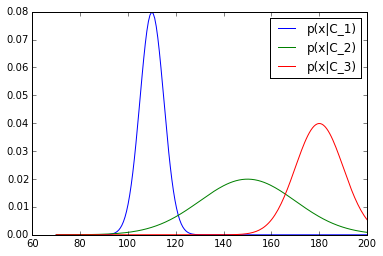

In [20]:
likelihood_c1 = stats.norm(110, 5)
likelihood_c2 = stats.norm(150, 20)
likelihood_c3 = stats.norm(180, 10)
xs = linspace(70, 200, 200)
plt.plot(xs, likelihood_c1.pdf(xs), label='p(x|C_1)')
plt.plot(xs, likelihood_c2.pdf(xs), label='p(x|C_2)')
plt.plot(xs, likelihood_c3.pdf(xs), label='p(x|C_3)')
plt.legend()
plt.show()


* **NB:** Pretpostavljamo da je razdioba primjera unutar svake klase unimodalna (modelirana jednom Gaussovom razdiobom)
  * Inače nam treba mješavina Gaussovih razdiobi (GMM)
  
  
* Model:
$$
    h_j(x) = p(x,\mathcal{C}_j) = p(x|\mathcal{C}_j)P(\mathcal{C}_j)
$$

* Radi matematičke jednostavnosti, prelazimo u logaritamsku domenu:
\begin{align*}
   h_j(x) & = \ln p(x|\mathcal{C}_j) + \ln P(\mathcal{C}_j)\\
        &=  
  \color{gray}{-\frac{1}{2}\ln 2\pi}
  - \ln\sigma_j
  - \frac{(x-\mu_j)^2}{2\sigma^2_j} + \ln P(\mathcal{C}_j)\\
\end{align*}

* Uklanajnje konstante (ne utječe na maksimizaciju):
$$
  h_j(x|\boldsymbol{\theta}_j) = - \ln\hat{\sigma}_j
  - \frac{(x-\hat{\mu}_j)^2}{2\hat{\sigma}^2_j} + \ln\hat{P}(\mathcal{C}_j)
$$
gdje je vektor parametara jednak
$$
\boldsymbol{\theta}_j=(\mu_j, \sigma_j, P(\mathcal{C}_j))
$$

* ML-procjene parametara:

\begin{align*}
\hat{\mu}_j &= \frac{1}{N_j}\sum_{i=1}^N \mathbf{1}\{y^{(i)} = \mathcal{C}_j\} x^{(i)}\\
\hat{\sigma}^2_j &= \frac{1}{N_j}\sum_{i=1}^N\mathbf{1}\{y^{(i)} = \mathcal{C}_j\}(x^{(i)}-\hat{\mu}_j)^2 \\
\hat{P}(\mathcal{C}_j) &= \frac{N_j}{N}\\
\end{align*}


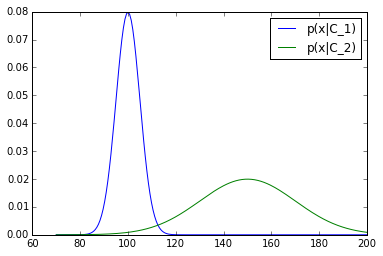

In [21]:
likelihood_c1 = stats.norm(100, 5)
likelihood_c2 = stats.norm(150, 20)

plt.plot(xs, likelihood_c1.pdf(xs), label='p(x|C_1)')
plt.plot(xs, likelihood_c2.pdf(xs), label='p(x|C_2)')
plt.legend()
plt.show()

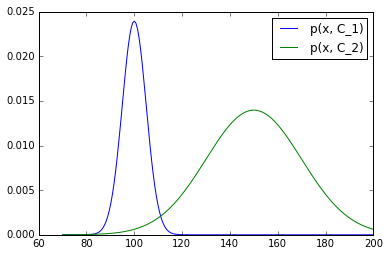

In [22]:
p_c1 = 0.3
p_c2 = 0.7

def joint_x_c1(x) : return likelihood_c1.pdf(x) * p_c1
def joint_x_c2(x) : return likelihood_c2.pdf(x) * p_c2

plt.plot(xs, joint_x_c1(xs), label='p(x, C_1)')
plt.plot(xs, joint_x_c2(xs), label='p(x, C_2)')
plt.legend()
plt.show()

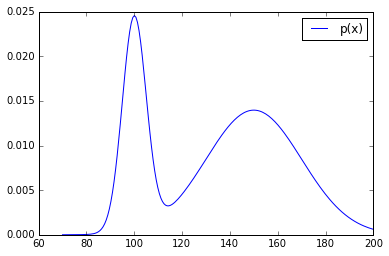

In [23]:
def p_x(x) : return joint_x_c1(x) + joint_x_c2(x)

plt.plot(xs, p_x(xs), label='p(x)')
plt.legend()
plt.show()

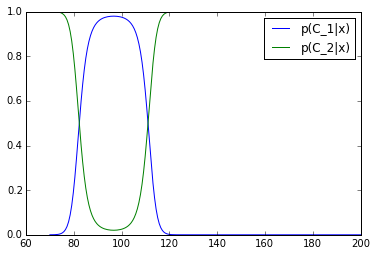

In [24]:
def posterior_c1(x) : return joint_x_c1(x) / p_x(x)
def posterior_c2(x) : return joint_x_c2(x) / p_x(x)

plt.plot(xs, posterior_c1(xs), label='p(C_1|x)')
plt.plot(xs, posterior_c2(xs), label='p(C_2|x)')
plt.legend()
plt.show()

### Višedimenzijski slučaj

* Izglednost klase:

\begin{equation*}
p(\mathbf{x}|\mathcal{C}_j) = 
\frac{1}{(2\pi)^{n/2}|\boldsymbol{\Sigma}_j|^{1/2}}
\exp\Big\{-\frac{1}{2}(\mathbf{x}^{(i)}-\boldsymbol{\mu}_j)^{\mathrm{T}}\boldsymbol{\Sigma}_j^{-1}(\mathbf{x}^{(i)}-\boldsymbol{\mu}_j)\Big\}
\end{equation*}

* Model:
$$
\begin{align*}
    h_j(\mathbf{x}) &= \ln p(\mathbf{x}|\mathcal{C}_j) + \ln P(\mathcal{C}_j)\\
&=  
\color{gray}{-\frac{n}{2}\ln 2\pi}
  - \frac{1}{2}\ln|\boldsymbol{\Sigma}_j|
  - \frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_j)^\mathrm{T}\boldsymbol{\Sigma}_j^{-1}(\mathbf{x}-\boldsymbol{\mu}_j) + \ln P(\mathcal{C}_j)\\
  &\Rightarrow  
  - \frac{1}{2}\ln|\boldsymbol{\Sigma}_j|
  - \frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_j)^\mathrm{T}\boldsymbol{\Sigma}_j^{-1}(\mathbf{x}-\boldsymbol{\mu}_j) + \ln P(\mathcal{C}_j)\\
\end{align*}
$$


* Interpretacija za $\boldsymbol{\mu}$ i $\boldsymbol{\Sigma}$:
  * $\boldsymbol{\mu}_j$ - prototipna vrijednost primjera u klasi $\mathcal{C}_j$
  * $\boldsymbol{\Sigma}_j$ - količina šuma i korelacija između izvora šuma unutar $\mathcal{C}_j$
  

* Q: Broj parametara?


* ML-procjene parametara:

\begin{align*}
\hat{\boldsymbol{\mu}}_j &= \frac{1}{N_j}\sum_{i=1}^N\mathbf{1}\{y^{(i)}=\mathcal{C}_j\}\mathbf{x}^{(i)}\\
\hat{\boldsymbol{\Sigma}}_j &= \frac{1}{N_j}\sum_{i=1}^N
\mathbf{1}\{y^{(i)}=\mathcal{C}_j\}(\mathbf{x}^{(i)}-\hat{\boldsymbol{\mu}}_j)(\mathbf{x}^{(i)}-\hat{\boldsymbol{\mu}}_j)^\mathrm{T}\\
\hat{P}(\mathcal{C}_j) &= \frac{N_j}{N}
\end{align*}


### O kovarijacijskoj matrici

\begin{equation*}
\boldsymbol{\Sigma} = \begin{pmatrix}
\mathrm{Var}(x_1) & \mathrm{Cov}(x_1, x_2) & \dots & \mathrm{Cov}(x_1,x_n)\\
\mathrm{Cov}(x_2, x_1) & \mathrm{Var}(x_2) & \dots & \mathrm{Cov}(x_2,x_n)\\
\vdots & \vdots & \ddots & \vdots \\
\mathrm{Cov}(x_n,x_1) & \mathrm{Cov}(x_n,x_2) & \dots & \mathrm{Var}(x_n)\\
\end{pmatrix}
\end{equation*}



* $\boldsymbol{\Sigma}$ je simetrična
    
    
* $\boldsymbol{\Sigma}$ uvijek **pozitivno semidefinitna**
  * $\Delta^2 = \mathbf{x}^{\mathrm{T}}\boldsymbol{\Sigma}\mathbf{x}\geq 0$
  * za Mahalanobisovu udaljenost vrijedi $\Delta\geq 0$


* Ali, da bi PDF bila dobro definirana, $\boldsymbol{\Sigma}$ mora biti **pozitivno definitna**: 
  * $\Delta^2 = \mathbf{x}^\mathrm{T}\boldsymbol{\Sigma}\mathbf{x} > 0$ za ne-nul vektor $\mathbf{x}$


* $\boldsymbol{\Sigma}$ je pozitivno definitna $\Rightarrow$ $\boldsymbol{\Sigma}$ je **nesingularna**: $|\boldsymbol{\Sigma}|>0$ i postoji $\boldsymbol{\Sigma}^{-1}$ (obrat ne vrijedi!)


* Ako $\boldsymbol{\Sigma}$ nije pozitivno definitna, najčešći uzroci su
  * $\mathrm{Var}(x_i)=0$ (beskorisna značajka)
  * $\mathrm{Cov}(x_i,x_j)=1$ (redundantan par značajki)

In [25]:
mu_1 = [-2, 1]
mu_2 = [2, 0]
covm_1 = sp.array([[1, 1], [1, 3]])
covm_2 = sp.array([[2, -0.5], [-0.5, 1]])
p_c1 = 0.4
p_c2 = 0.6

likelihood_c1 = stats.multivariate_normal(mu_1, covm_1)
likelihood_c2 = stats.multivariate_normal(mu_2, covm_2)

In [26]:
x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
X, Y = np.meshgrid(x, y)
XY = np.dstack((X,Y))

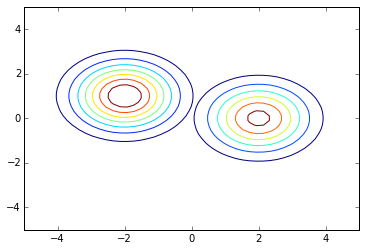

In [35]:
plt.contour(X, Y, likelihood_c1.pdf(XY) * p_c1)
plt.contour(X, Y, likelihood_c2.pdf(XY) * p_c2);

* Granica između klasa $\mathcal{C}_1$ i $\mathcal{C}_2$ je:
$$
h_1(\mathbf{x}) = h_2(\mathbf{x})
$$
tj.
$$
h_1(\mathbf{x}) - h_2(\mathbf{x}) = 0
$$

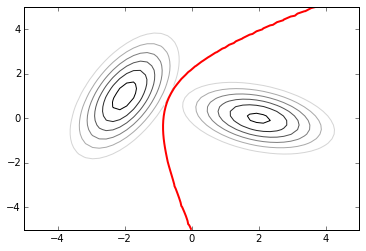

In [28]:
plt.contour(X, Y, likelihood_c1.pdf(XY) * p_c1, cmap='gray_r')
plt.contour(X, Y, likelihood_c2.pdf(XY) * p_c2, cmap='gray_r')
plt.contour(X, Y, likelihood_c1.pdf(XY) * p_c1 - likelihood_c2.pdf(XY) * p_c2, levels=[0], colors='r', linewidths=2);

* Granca je nelinearna jer postoji član koji kvadratno ovisi o $\mathbf{x}$ (i taj član ne iščezava kada računamo razliku $h_1(x)-h_2(x)$):

\begin{align*}
    h_j(\mathbf{x}) &=  
\color{gray}{-\frac{n}{2}\ln 2\pi}
  - \frac{1}{2}\ln|\boldsymbol{\Sigma}_j|
  - \frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_j)^\mathrm{T}\boldsymbol{\Sigma}_j^{-1}(\mathbf{x}-\mathbf{\mu}_j) + \ln P(\mathcal{C}_j)\\
  &\Rightarrow
  - \frac{1}{2}\ln|\boldsymbol{\Sigma}_j|
  - \frac{1}{2}\big(\color{red}{\mathbf{x}^\mathrm{T}\boldsymbol{\Sigma}_j^{-1}\mathbf{x}} -2\mathbf{x}^\mathrm{T}\boldsymbol{\Sigma}_j^{-1}\boldsymbol{\mu}_j +\boldsymbol{\mu}_j^\mathrm{T}\boldsymbol{\Sigma}_j^{-1}\boldsymbol{\mu}_j\big) + \ln P(\mathcal{C}_j)
\end{align*}





* Kvadratni model ima previše parametara: $\mathcal{O}(n^2)$


* Pojednostavljenja $\Rightarrow$ dodatne induktivne pretpostavke?

### 1. pojednostavljenje: dijeljena kovarijacijska matrica

$$
\hat{\boldsymbol{\Sigma}} = \sum_j \hat{P}(\mathcal{C}_j)\hat{\boldsymbol{\Sigma}}_j
$$

\begin{align*}
h_j(\mathbf{x})    &=  
  \color{gray}{- \frac{1}{2}\ln|\boldsymbol{\Sigma}|}
  - \frac{1}{2}(\color{gray}{\mathbf{x}^\mathrm{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}} -2\mathbf{x}^\mathrm{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_j
  +\boldsymbol{\mu}_j^\mathrm{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_j) + \ln P(\mathcal{C}_j)\\
   &\Rightarrow
  \mathbf{x}^\mathrm{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_j -\frac{1}{2}\boldsymbol{\mu}_j^\mathrm{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_j + \ln P(\mathcal{C}_j)
\end{align*}


* Član $\mathbf{x}^\mathrm{T}\boldsymbol{\Sigma}^{-1}\mathbf{x}$ isti je za svaki $h_j$, pa iščezava kada računamo granicu između klasa


* Dakle, dobivamo **linearan model**!


* Broj parametara?

In [29]:
mu_1 = [-2, 1]
mu_2 = [2, 0]
covm_1 = sp.array([[1, 1], [1, 3]])
covm_2 = sp.array([[2, -0.5], [-0.5, 1]])
p_c1 = 0.4
p_c2 = 0.6

covm_shared = (p_c1 * covm_1 + p_c2 * covm_2) / 2

likelihood_c1 = stats.multivariate_normal(mu_1, covm_shared)
likelihood_c2 = stats.multivariate_normal(mu_2, covm_shared)

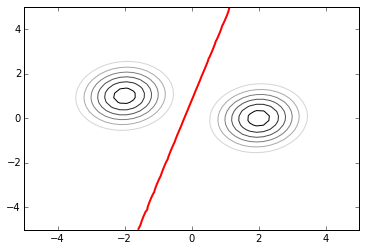

In [30]:
plt.contour(X, Y, likelihood_c1.pdf(XY) * p_c1, cmap='gray_r')
plt.contour(X, Y, likelihood_c2.pdf(XY) * p_c2, cmap='gray_r')
plt.contour(X, Y, likelihood_c1.pdf(XY) * p_c1 - likelihood_c2.pdf(XY) * p_c2, levels=[0], colors='r', linewidths=2);

### 2. pojednostavljenje: dijagonalna kovarijacijska matrica

$$
\boldsymbol{\Sigma} = \mathrm{diag}(\sigma_i^2) \quad \Rightarrow \quad 
|\boldsymbol{\Sigma}|=\prod_i\sigma_i,\quad 
\boldsymbol{\Sigma}^{-1}=\mathrm{diag}(1/\sigma_i^2) 
$$

* Izglednost klase:
\begin{align*}
p(\mathbf{x}|\mathcal{C}_j) &= 
\frac{1}{(2\pi)^{n/2}|\boldsymbol{\Sigma}|^{1/2}}
\exp\Big\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_j)^\mathrm{T}\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}_j)\Big\}\\
&=
\frac{1}{(2\pi)^{n/2}\color{red}{\prod_{i=1}^n\sigma_i}}
\exp\Big\{-\frac{1}{2}\sum_{i=1}^n\Big(\frac{x_i-\mu_{ij}}{\color{red}{\sigma_i}}\Big)^2\Big\}\\
&= \prod_{i=1}^n
\frac{1}{\sqrt{2\pi}\sigma_i}
\exp\Big\{-\frac{1}{2}(\frac{x_i-\mu_{ij}}{\sigma_i}\Big)^2\Big\}
= \prod_{i=1}^n\mathcal{N}(\mu_{ij},\sigma_i^2)
\end{align*}


* Dobili smo umnožak univarijatnih Gaussovih distribucija


* **NB:** Ovo je **naivan Bayesov klasifikator** (za kontinuirane značajke)!
  * $x_i\bot x_k|\mathcal{C}_j\ \Rightarrow\ \mathrm{Cov}(x_i|\mathcal{C}_j, x_k|\mathcal{C}_j)=0$
  * $p(x|\mathcal{C}_j) = \prod_i p(x_i|\mathcal{C}_j)$
  

* Model:
\begin{align*}
    h_j(\mathbf{x}) &= \ln p(\mathbf{x}|\mathcal{C}_j) + \ln P(\mathcal{C}_j)\\
             &\Rightarrow
 -\frac{1}{2}\sum_{i=1}^n\Big(\frac{x_i-\mu_{ij}}{\sigma_i}\Big)^2 + \ln \Pr{\mathcal{C}_j}
\end{align*}


* **NB:** Računamo normirane euklidske udaljenosti (normirane sa $\sigma_i$)


* Q: Broj parametara?

In [31]:
mu_1 = [-2, 1]
mu_2 = [2, 0]
p_c1 = 0.4
p_c2 = 0.6

covm_shared_diagonal = [[2,0],[0,1]]

likelihood_c1 = stats.multivariate_normal(mu_1, covm_shared_diagonal)
likelihood_c2 = stats.multivariate_normal(mu_2, covm_shared_diagonal)

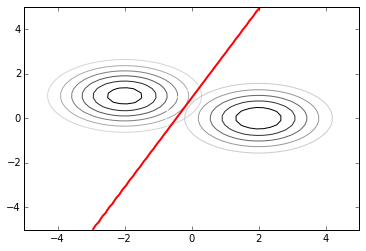

In [32]:
plt.contour(X, Y, likelihood_c1.pdf(XY) * p_c1, cmap='gray_r')
plt.contour(X, Y, likelihood_c2.pdf(XY) * p_c2, cmap='gray_r')
plt.contour(X, Y, likelihood_c1.pdf(XY) * p_c1 - likelihood_c2.pdf(XY) * p_c2, levels=[0], colors='r', linewidths=2);

### 3. pojednostavljenje: izotropna kovarijacijska matrica

$$
\boldsymbol{\Sigma}=\sigma^2\mathbf{I}
$$

\begin{equation*}
h_j(\mathbf{x}) = -\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu_{ij})^2 + \ln P(\mathcal{C}_j)
\end{equation*}

* Broj parametara?



In [33]:
mu_1 = [-2, 1]
mu_2 = [2, 0]
p_c1 = 0.4
p_c2 = 0.6

covm_shared_diagonal = [[1,0],[0,1]]

likelihood_c1 = stats.multivariate_normal(mu_1, covm_shared_diagonal)
likelihood_c2 = stats.multivariate_normal(mu_2, covm_shared_diagonal)

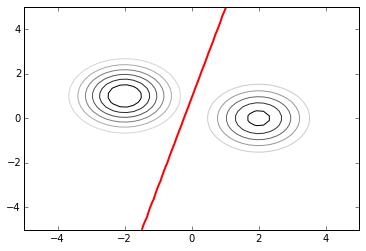

In [34]:
plt.contour(X, Y, likelihood_c1.pdf(XY) * p_c1, cmap='gray_r')
plt.contour(X, Y, likelihood_c2.pdf(XY) * p_c2, cmap='gray_r')
plt.contour(X, Y, likelihood_c1.pdf(XY) * p_c1 - likelihood_c2.pdf(XY) * p_c2, levels=[0], colors='r', linewidths=2);

### 4. pojednostavljenje: jednake apriorne vjerojatnosti

\begin{align*}
    h_j(\mathbf{x}) &= \color{gray}{-\frac{1}{2\sigma^2}}\sum_{i=1}^n(x_i-\mu_{ij})^2 + \color{gray}{\ln
    P(\mathcal{C}_j)}\\
    &\Rightarrow - \|\mathbf{x}-\boldsymbol{\mu}_j\|^2\\
   &= -(\mathbf{x}-\boldsymbol{\mu}_j)^\mathrm{T}(\mathbf{x}-\boldsymbol{\mu}_j) =
- (\mathbf{x}^\mathrm{T}\mathbf{x} - 2\mathbf{x}^\mathrm{T}\boldsymbol{\mu}_j + \boldsymbol{\mu}_j^\mathrm{T}\boldsymbol{\mu}_j)\\
&\Rightarrow \mathbf{w}_j^\mathrm{T}\mathbf{x} + w_{j0}
\end{align*}


* Možemo staviti $\mathbf{w}_j=\boldsymbol{\mu}_j$
  * Dakle, model klasificira primjer $\mathbf{x}$ u klasu $\mathcal{C}_j$ s najbližim centroidom $\boldsymbol{\mu}_j$


* Broj parametara?


* Q: Koji model od navedenih pet odabrati? Model s punom kovarijacijskom matricom ili jedno od četiri pojednostavljenja?


# Bayesov klasifikator: komponente algoritma

* **(1) Model $\mathcal{H}$:**
$$
        \begin{align*}
            \mathcal{H} &= \big\{h(\mathbf{x}|\boldsymbol{\theta})\big\}_{\boldsymbol{\theta}}\\
            h(\mathbf{x}|\boldsymbol{\theta})
            &=\big(h_1(\mathbf{x}|\boldsymbol{\theta}_1),\dots,h_K(\mathbf{x}|\boldsymbol{\theta}_K)\big)\\          
    \boldsymbol{\theta} &= (\boldsymbol{\theta}_1,\dots,\boldsymbol{\theta}_K)\\
   h_j(\mathbf{x}|\boldsymbol{\theta}_j) &= \ln p(\mathbf{x}|\boldsymbol{\mu}_j,\boldsymbol{\Sigma}_j) + \ln P(\mathcal{C}_j)\\
            \boldsymbol{\theta}_j & = (\boldsymbol{\mu}_j,\boldsymbol{\Sigma}_j,P(\mathcal{C}_j))\\
        \end{align*}
$$
    

* generativan - diskriminativan ?

* parametarski - neparametarski ?

* linearan - nelinearan ?

* pristanost jezika - pristranost pretraživanja ?


* **(3) Optimizacijski postupak**
  * MLE: 
\begin{align*}
    \boldsymbol{\theta}^* &= 
\mathrm{argmax}_{\boldsymbol{\theta}}\ \mathcal{L}(\boldsymbol{\theta}|\mathcal{D}) = 
\mathrm{argmin}_{\boldsymbol{\theta}}\ \big(-\mathcal{L}(\boldsymbol{\theta}|\mathcal{D})\big) \\
\end{align*}

* **(2) Funkcija gubitka $L$**
  * Možemo je izvesti iz gornjeg izraza (uvažavajući činjenicu da je ono što optimizacijski postupak minimizira funkcija pogreške, a da je funkcija pogreške jednaka očekivanju gubitka)
  * Dobivamo:
  $$
  L\big(y^{(i)},h(\mathbf{x}^{(i)}|\boldsymbol{\theta})\big) = - N \ln p(x^{(i)},y^{(i)} | \boldsymbol{\theta})
  $$
  tj. gubitak (za neku određenu klasu) proporcionalan je s negativnom logaritmom zajedničke vjerojatnosti za tu klasu i dotičan primjer (što je veća vjerojatnost da primjer pripada u tu klasu, to je manji gubitak)
 


# Sažetak


* Bayesov klasifikator je **generativan parametarski** model koji primjere klasificira na temelju **MAP-hipoteze**


* Učenje Bayesovog klasifikatora za kontinuirane ulaze svodi se na **procjenu parametara** (MLE, MAP)


* Naivan Bayesov klasifikator koristi pretpostavku o **nezavisnosti značajki za zadanu klasu**, koja omogućuje **generalizaciju** i **pojednostavljuje** model (broj parametara je linearan s $n$)


* Kod diskretnog Bayesovog klasifikatora izglednosti klasa modeliramo **Bernoullijevom/kategoričkom** razdiobom, a kod kontinuiranog **Gaussovom razdiobom** (modelira šum)


* Naivan Bayesov klasifikator (diskretan ili kontinuiran) je **linearan model**


* **Polunaivan klasifikator** modelira zavisnost između odabranih varijabli, čime dobivamo **složeniji model**
